# Two qubit operations and CHSH inequality
In this notebook, we're going to investigate two-qubit gates that act on two different qubits simultaneously.  
- First, we start basic two-qubit operations such as the CX gate and the CZ gate.  
- Second, we introduce a special quantum state called "Bell state," one of the most critical resources in quantum computing and quantum communication.  
- Finally, we demonstrate a violation of the CHSH inequality with Qiskit.

In [1]:
# if you already have qiskit in your environment, you don't have to run this again.
!pip install qiskit
!pip install pylatexenc
!pip install seaborn

try:
    import matplotlib
except:
    !pip install matplotlib
    import matplotlib

You should consider upgrading via the '/Users/ryosuke/.local/share/virtualenvs/gp_thesis-elBFKE37/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/ryosuke/.local/share/virtualenvs/gp_thesis-elBFKE37/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/ryosuke/.local/share/virtualenvs/gp_thesis-elBFKE37/bin/python3.8 -m pip install --upgrade pip' command.


[Qiskit](https://github.com/Qiskit)

In [2]:
# import module we use
from qiskit import (QuantumCircuit,
                    QuantumRegister,
                    ClassicalRegister,
                    execute,
                    Aer,
                    transpile)
from qiskit.providers.aer.noise import NoiseModel, pauli_error, depolarizing_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Two qubit operations
> If you're familiar with the basics of quantum computing, you can skip this section.

We have several important two-qubit gates.  
- Controlled-X (CX, CNOT) gate  
- Controlled-Z (CZ, CPhase) gate  
- Swap gate  

We can create entanglement that is the crucial phenomenon in quantum physics, by using two-qubit gates.  
Let's have a look at each gate closely.

### CX gate
Controlled-Not (CNOT, CX) gate is one of the most fundamental two-qubit gates.  
When the control qubit click, the CNOT gate applies the Pauli-X gate to the target qubit.   
The matrix representation of the CNOT gate is,
$$
CNOT = |0\rangle\langle0|\otimes{I} + |1\rangle\langle 1|\otimes{X} =
\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{array}\right]
$$

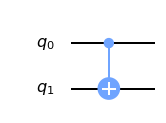

In [3]:
# create an insance of quantum circuit
qc = QuantumCircuit(2)
# apply cx gate from 0th qubit to 1st qubit
qc.cx(0, 1)
qc.draw(output="mpl")

This is the circuit representation of the CX gate.  
A small dot on the first qubit means the target, and a relatively large circle represents the Pauli-X gate.

### CZ gate
Controlled-Z (Controlled-Phase) gate applies the Pauli-Z gate when the control qubit is $|1\rangle$.  
This gate is used for creating a graph state that is a critical resource for measurement-based quantum computing.  
The matrix representation of the CZ gate is,
$$
CZ = |0\rangle\langle0|\otimes{I} + |1\rangle\langle 1|\otimes{Z} =
\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{array}\right]
$$

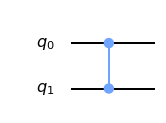

In [4]:
# create an insance of quantum circuit
qc = QuantumCircuit(2)
# apply cz gate from 0th qubit to 1st qubit
qc.cz(0, 1)
qc.draw(output="mpl")

### Swap gate
Swap gate literary swap the two quantum states.   
If we apply the swap gate between the first and the second qubit, then the first qubit's state is updated to the second qubit's state and vice versa.
The matrix representation of the Swap gate is,
$$
Swap =
\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{array}\right]
$$

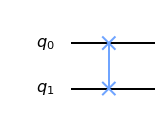

In [5]:
# create an insance of quantum circuit
qc = QuantumCircuit(2)
# apply swap gate from 0th qubit to 1st qubit
qc.swap(0, 1)
qc.draw(output="mpl")

## 2. Bell pair (Bell state)
As special states in entangled states, we have "Bell State," one of two qubits entangled states. 
$$
|\phi^{+}\rangle = \frac{|00\rangle+|11\rangle}{\sqrt{2}}\\
|\phi^{-}\rangle = \frac{|00\rangle-|11\rangle}{\sqrt{2}}\\
|\psi^{+}\rangle = \frac{|01\rangle+|10\rangle}{\sqrt{2}}\\
|\psi^{-}\rangle = \frac{|01\rangle-|10\rangle}{\sqrt{2}}
$$
These are four types of Bell states showing the simplest examples of two qubit entangled state.  
Following quantum circuits show how to create those states.

### 2-1. $\phi^{+}$ state
$$|\phi^{+}\rangle = \frac{|00\rangle+|11\rangle}{\sqrt{2}}$$

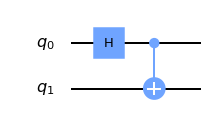

In [6]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw(output="mpl")

### 2-2. $\phi^{-}$ state
$$|\phi^{-}\rangle = \frac{|00\rangle-|11\rangle}{\sqrt{2}}$$

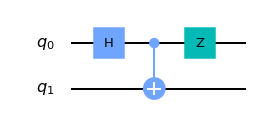

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.z(0)
qc.draw(output="mpl")

### 2-3. $\psi^{+}$ state
$$|\psi^{+}\rangle = \frac{|01\rangle+|10\rangle}{\sqrt{2}}$$

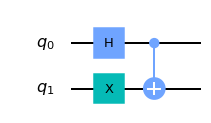

In [8]:
qc = QuantumCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0, 1)
qc.draw(output="mpl")

### 2-4. $\psi^{-}$ state
$$|\psi^{-}\rangle = \frac{|01\rangle-|10\rangle}{\sqrt{2}}$$

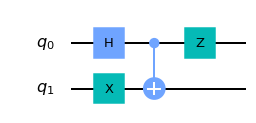

In [9]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0, 1)
qc.z(0)
qc.draw(output="mpl")

Quantum Teleportation protocol is one good example application of Bell state. See details [here.](https://qiskit.org/textbook/ch-algorithms/teleportation.html)

## 3. Vaiolation of CHSH inequality.
What is CHSH inequality? https://en.wikipedia.org/wiki/CHSH_inequality  
Briefly, CHSH inequality is a proof of bell's theorem.   
Usually, CHSH inequality satisfies,

$$|\langle{A, B}\rangle-\langle{a, B}\rangle+\langle{A, b}\rangle + \langle{a, b}\rangle| \leq 2$$  
in a classical system. However, in a quantum system, this inequality satisfies
$$2 < |\langle{A, B}\rangle-\langle{a, B}\rangle+\langle{A, b}\rangle + \langle{a, b}\rangle|\leq2\sqrt{2}$$  
A, B, a, b represent the basis of measurement.

In [10]:
# Circuit for AB measurement (Z, {Z+X}/sqrt(2))
qAB, cAB = QuantumRegister(2, "q"), ClassicalRegister(2, "c")
AB_measure = QuantumCircuit(qAB, cAB, name="AB")
    # Just Z measurement
AB_measure.measure(qAB[0], cAB[0])
AB_measure.s(qAB[1])
AB_measure.h(qAB[1])
AB_measure.t(qAB[1])
AB_measure.h(qAB[1])
AB_measure.measure(qAB[1], cAB[1])

# Circuit for Ab measurement (Z, {Z-X}/sqrt(2))
qAb, cAb = QuantumRegister(2, "q"), ClassicalRegister(2, "c")
Ab_measure = QuantumCircuit(qAb, cAb,  name="Ab")
    # Just Z measurement
Ab_measure.measure(qAb[0], cAb[0])
Ab_measure.s(qAb[1])
Ab_measure.h(qAb[1])
Ab_measure.tdg(qAb[1])
Ab_measure.h(qAb[1])
Ab_measure.measure(qAb[1], cAb[1])

# Circuit for aB measurement (X, {Z+X}/sqrt(2))
qaB, caB = QuantumRegister(2, "q"), ClassicalRegister(2, "c")
aB_measure = QuantumCircuit(qaB, caB,  name="aB")
# X measurement
aB_measure.h(qaB[0])
aB_measure.measure(qaB[0], caB[0])

aB_measure.s(qaB[1])
aB_measure.h(qaB[1])
aB_measure.t(qaB[1])
aB_measure.h(qaB[1])
aB_measure.measure(qaB[1], caB[1])


# Circuit for ab measurement (X, {Z-X}/sqrt(2))
qab, cab = QuantumRegister(2, "q"), ClassicalRegister(2, "c")
ab_measure = QuantumCircuit(qab, cab,  name="ab")
ab_measure.h(qab[0])
ab_measure.measure(qab[0], cab[0])
ab_measure.s(qab[1])
ab_measure.h(qab[1])
ab_measure.tdg(qab[1])
ab_measure.h(qab[1])
ab_measure.measure(qab[1], cab[1])

First step (Preparation of Quantum Circuit)

In [11]:
# prepare circuit with two qubits and two classical bits
q = QuantumRegister(2, "q")
qc = QuantumCircuit(q)

Second step (Creating Bell state)

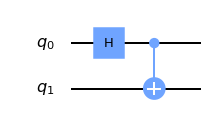

In [12]:
qc.h(q[0])
qc.cx(q[0], q[1])
qc.draw(output="mpl")

#### Third step (Measurement)
We're going to measure that circuit in the four different computational basis.   
A = Z  
a = X  
B = $\frac{Z+X}{\sqrt{2}}$  
b = $\frac{Z-X}{\sqrt{2}}$  

In the qiskit, measurement basis is Z if you don't apply any operations.  

To change the measurement basis, you need to apply operations before measurement.  
You have to calculate one state with four basis.

In [13]:
# Prepare four different circuits
AB_circuit = qc + AB_measure
Ab_circuit = qc + Ab_measure
aB_circuit = qc + aB_measure
ab_circuit = qc + ab_measure

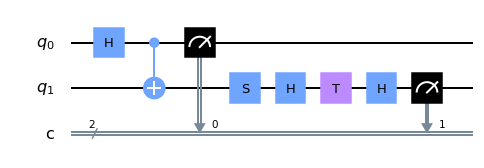

In [14]:
AB_circuit.draw(output="mpl")

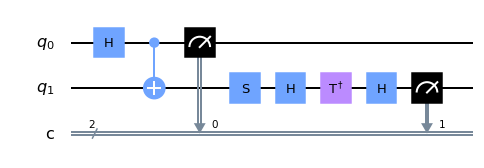

In [15]:
Ab_circuit.draw(output="mpl")

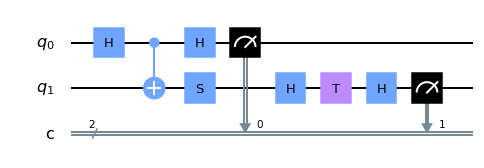

In [16]:
aB_circuit.draw(output="mpl")

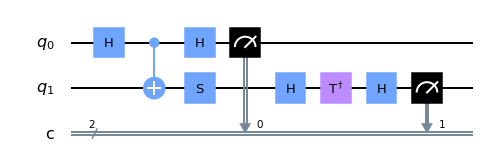

In [17]:
ab_circuit.draw(output="mpl")

OK, now we prepared four quantum circuits. Let's run all of them.

In [18]:
circuits = [AB_circuit, Ab_circuit, aB_circuit, ab_circuit]
backend = Aer.get_backend("qasm_simulator")
shots = 100000

job = execute(circuits, backend=backend, shots=shots)
counts = [job.result().get_counts(c) for c in circuits]
print("The actual circuit counts we got")
print(counts)

The actual circuit counts we got
[{'00': 3474, '01': 618, '10': 608, '11': 3492}, {'00': 3528, '01': 616, '10': 610, '11': 3438}, {'00': 3528, '01': 624, '10': 570, '11': 3470}, {'00': 622, '01': 3534, '10': 3418, '11': 618}]


#### Final step (Calculate S value)
Finally, we need to calculate S value.
If you chose $|\psi^+\rangle$ or  $|\psi^-\rangle$, calculate $$\langle{MN}\rangle =  P(|00\rangle)+P(|11\rangle)-P(|01\rangle)-P(|10\rangle)$$   
else you chose $|\phi^+\rangle$ or $|\phi^+\rangle$, then you need to  
$$\langle{MN}\rangle = P(|01\rangle)+P(|10\rangle)-P(|00\rangle)-P(|11\rangle)$$
for each of basis.
And $$S = |\langle{AB}\rangle-\langle{aB}\rangle+\langle{Ab}\rangle+\langle{ab}\rangle|$$

In [19]:
# we can get four possible binaries as a result.
bins = [format(i, "02b") for i in range(2**2)]
basis = ("AB", "Ab", "aB", "ab")
print(f"{'':2}", f"{'| 00':10}", f"{'| 01':10}", f"{'| 10':10}", f"{'| 11':10}", "|")
MN = []
for bas, c in zip(basis, counts):
    probs = np.array([c.get(b, 0) for b in bins])/shots
    MN.append(probs[0] + probs[3] - probs[2] - probs[1])
    print(bas, probs, f"F({bas}) = ", MN[-1])
# just abs is fine tho
S = sum([i if i>0 else -i for i in MN])
# There would be rounding errors, and S value might exceed 2*sqrt(2) sometime
print("S value: ", S, "Success!" if 2<S<=2*np.sqrt(2) else "Fail!")

   | 00       | 01       | 10       | 11       |
AB [0.42407227 0.07543945 0.07421875 0.42626953] F(AB) =  0.70068359375
Ab [0.43066406 0.07519531 0.07446289 0.41967773] F(Ab) =  0.70068359375
aB [0.43066406 0.07617188 0.06958008 0.42358398] F(aB) =  0.70849609375
ab [0.07592773 0.43139648 0.41723633 0.07543945] F(ab) =  -0.697265625
S value:  2.80712890625 Success!


## supplemental
Varying error rate of two qubit gate

In [23]:
shots = 1000
bins = [format(i, "02b") for i in range(2**2)]
Svals = []
two_errors = np.arange(0, 0.5, 0.01)
for prob_2 in two_errors:
    noise_model = NoiseModel()
    error_2 = depolarizing_error(prob_2, 2)
    noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
    backend = Aer.get_backend("qasm_simulator")

    job = execute(circuits, backend=backend, shots=shots, noise_model=noise_model)
    counts = [job.result().get_counts(c) for c in circuits]
    MN = []
    for bas, c in zip(basis, counts):
        probs = np.array([c.get(b, 0) for b in bins])/shots
        MN.append(probs[0] + probs[3] - probs[2] - probs[1])
    # just abs is fine tho
    S = sum([i if i>0 else -i for i in MN])
    Svals.append(S)

In [ ]:

fig = plt.figure(figsize=(15, 10))
sns.set()
plt.title("S value transitions over different error rates")
plt.plot(two_errors, Svals)
plt.show()